In [ ]:
#1. setup and loading 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#defining file path for dataset
file_path = '/Volumes/SHAYNE SSD/Project_Datasets/House_Price_Predictor/data_kaggle.csv'

#attempt to load data into dataframe 'df'
df = pd.read_csv(file_path)
# print("Dataset loaded succesfully. First 55 rows:")
# df.head()

In [ ]:
#2. Initial Data Exploration
print("Dataframe info:")
df.info() #tells us the number of entries, the column names, the number of non-null values, and the data type of each column.

print("\nDataframe shape:")
print(f"rows: {df.shape[0]} \n columns: {df.shape[1]}")

In [ ]:
#3. Data cleaning (price)
print("before clean:")
print(df["Price"].head())
print("\ndata type before clean:")
print(df["Price"].dtype)

df["Price_Original"] = df["Price"] #create copy of 'Price' for backup 
df["Price"] = df["Price"].str.replace("RM", "").str.replace(",", "") #replace "RM" and "," with blank (remove)

df["Price"] = pd.to_numeric(df["Price"], errors = 'coerce')

#check
print("\n\nafter clean:")
print(df["Price"].head())
print("\ndata type after clean:")
print(df["Price"].dtype)

In [ ]:
#4. Data Cleaning (size)
print("Before clean:")
print(df["Size"].head())
print("\nData type before clean:")
print(df["Size"].dtype)

df["Size_sqft"] = df["Size"].str.extract("(\d[\d,']*)")
df["Size_sqft"] = df["Size_sqft"].str.replace(",", "") #replace ","
df["Size_sqft"] = pd.to_numeric(df["Size_sqft"], errors = 'coerce') #convert str to int

#check
print("\n\nBefore clean:")
print(df["Size_sqft"].head())
print("\nAfter clean:")
print(df["Size_sqft"].dtype)

In [ ]:
#5. handle missing data 
print("Before handle:")
print(df.isnull().sum())
print("\nTotal rows before drop")
print(df.shape[0])

df.dropna(subset = ["Price", "Size_sqft"], inplace = True) #subset argument tells it to only look for NaN in Price and Size_sqft

#check
print("\n\nAfter handle:")
print(df.isnull().sum())
print("\nTotal numbers after drop")
print(df.shape[0])

In [ ]:
#6. Cleaning and Imputing Rooms, Bathrooms, and Car Parks 

df['Rooms_Cleaned'] = df['Rooms'].str.extract('(\d)').astype(float)


#Impute Missing Values with the Median

median_rooms = df['Rooms_Cleaned'].median()
median_bathrooms = df['Bathrooms'].median()
median_carparks = df['Car Parks'].median()

print(f"Median for Rooms: {median_rooms}")
print(f"Median for Bathrooms: {median_bathrooms}")
print(f"Median for Car Parks: {median_carparks}")

df['Rooms_Cleaned'].fillna(median_rooms, inplace=True)
df['Bathrooms'].fillna(median_bathrooms, inplace=True)
df['Car Parks'].fillna(median_carparks, inplace=True)


#check
print("\n--- Missing values AFTER imputation ---")
print(df.isnull().sum())



In [ ]:
#7. Handling Categorical Columns (Property Type and Furnishing) 

# --- Inspect the columns before cleaning ---
# .value_counts() is a great way to see the different categories and their frequencies.
# We use dropna=False to include the count of NaN (missing) values in the output.
print("--- Value counts for 'Property Type' (before imputation) ---")
print(df['Property Type'].value_counts(dropna=False))

print("\n--- Value counts for 'Furnishing' (before imputation) ---")
print(df['Furnishing'].value_counts(dropna=False))


# --- Impute Missing Values with the Mode ---

# 1. Calculate the mode for each column. The mode is the most common category.
# The .mode() method returns a Series (in case of a tie), so we select the first item with [0].
mode_property_type = df['Property Type'].mode()[0]
mode_furnishing = df['Furnishing'].mode()[0]

print(f"\nMode for Property Type: '{mode_property_type}'")
print(f"Mode for Furnishing: '{mode_furnishing}'")


# 2. Fill the missing values (NaNs) with the calculated mode.
df['Property Type'].fillna(mode_property_type, inplace=True)
df['Furnishing'].fillna(mode_furnishing, inplace=True)


# --- Verification ---
# Check the missing values again. Almost all should be 0 now.
# The original 'Rooms' and 'Size' columns will still show NaNs, but we have our cleaned versions.
print("\n--- Missing values AFTER final imputation ---")
print(df.isnull().sum())

print("\n\nData cleaning and imputation is now complete!")



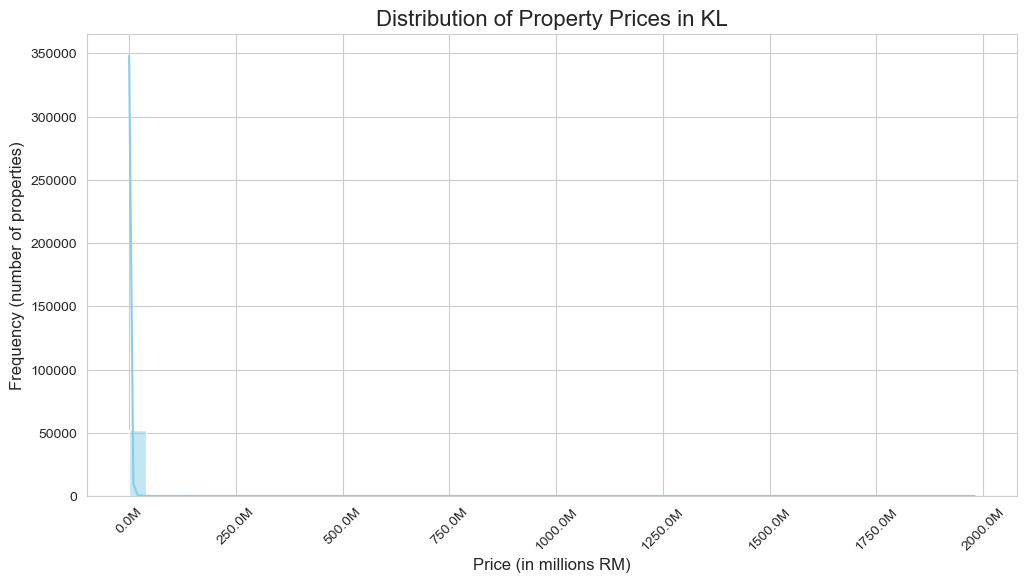

Skewness of Price: 98.79
99th percentile price (cutoff for outliers: RM13,800,000.00
plot the 51988


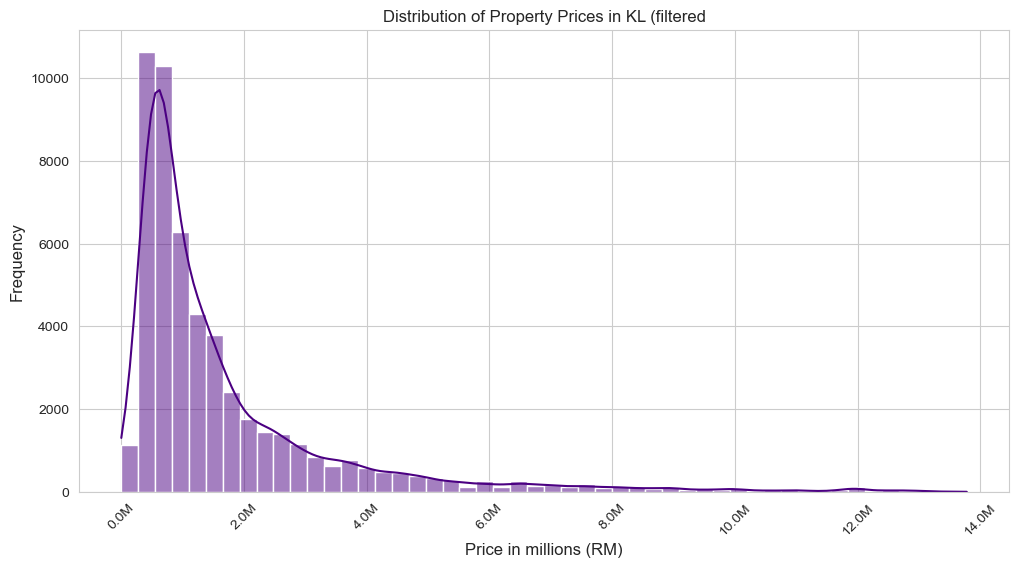

skewness of filtered price: 2.7643077115757504


In [43]:
#8. EDA

sns.set_style("whitegrid") #set style
plt.figure(figsize=(12, 6)) #create figure and specify size

sns.histplot(df["Price"], kde = True, bins = 50, color = "skyblue") #plot histogram, 50 bins = 50 bars

plt.title("Distribution of Property Prices in KL", fontsize = 16) #title
plt.xlabel("Price (in millions RM)", fontsize = 12) 
plt.ylabel("Frequency (number of properties)", fontsize = 12)

def format_price(x, pos): #this function formats 1,000,000 as '1.0M'
    'the two args are the value and tick position'
    return f'{x/1000000:.1f}M'

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_price)) #get current axes and apply custom formatter
plt.xticks(rotation = 45)

plt.show()

price_skewness = df["Price"].skew()
print(f"Skewness of Price: {price_skewness:.2f}")


#9 analyzing distrtibution without extreme outliers
price_cutoff = df["Price"].quantile(0.99)
print(f"99th percentile price (cutoff for outliers: RM{price_cutoff:,.2f}")

df_filtered = df[df["Price"] < price_cutoff]
print(f"plot the {len(df_filtered)}") #print 99% of properties

#plotting new histogram
plt.figure(figsize=(12,6)) #plot new filtered histogram

sns.histplot(df_filtered["Price"], kde = True, bins = 50, color = "indigo")

plt.title("Distribution of Property Prices in KL (filtered")
plt.xlabel("Price in millions (RM)", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_price))
plt.xticks(rotation = 45)

plt.show()
filtered_price_skewness = df_filtered["Price"].skew()
print(f"skewness of filtered price: {filtered_price_skewness}")